In [2]:
# Done By Perla Pawan Phanieswar
# VIT-AP
# Roll Number = 21BCE9164

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Titanic-Dataset.csv")

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


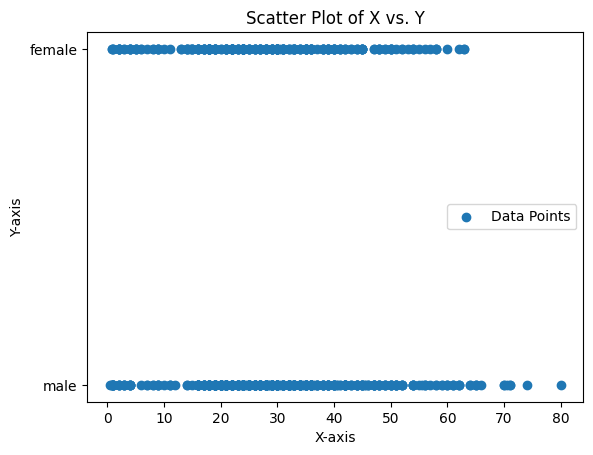

In [9]:
x = df["Age"]
y = df["Sex"]

# Create a scatter plot
plt.scatter(x, y, label="Data Points")

# Add labels and a title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of X vs. Y")

plt.legend()
plt.show()

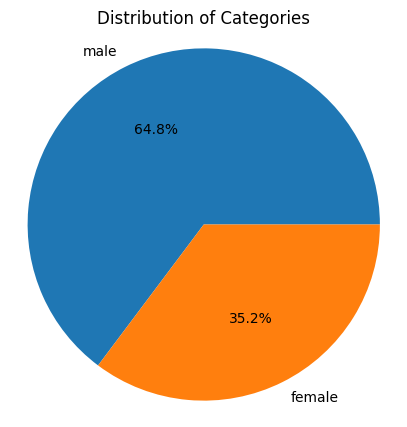

In [10]:
category_counts = df["Sex"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')

plt.title("Distribution of Categories")

plt.axis('equal')
plt.show()

In [11]:
# checking null values if any

df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [12]:
#  getting the number of null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ipython-input-13-09abaea77244>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

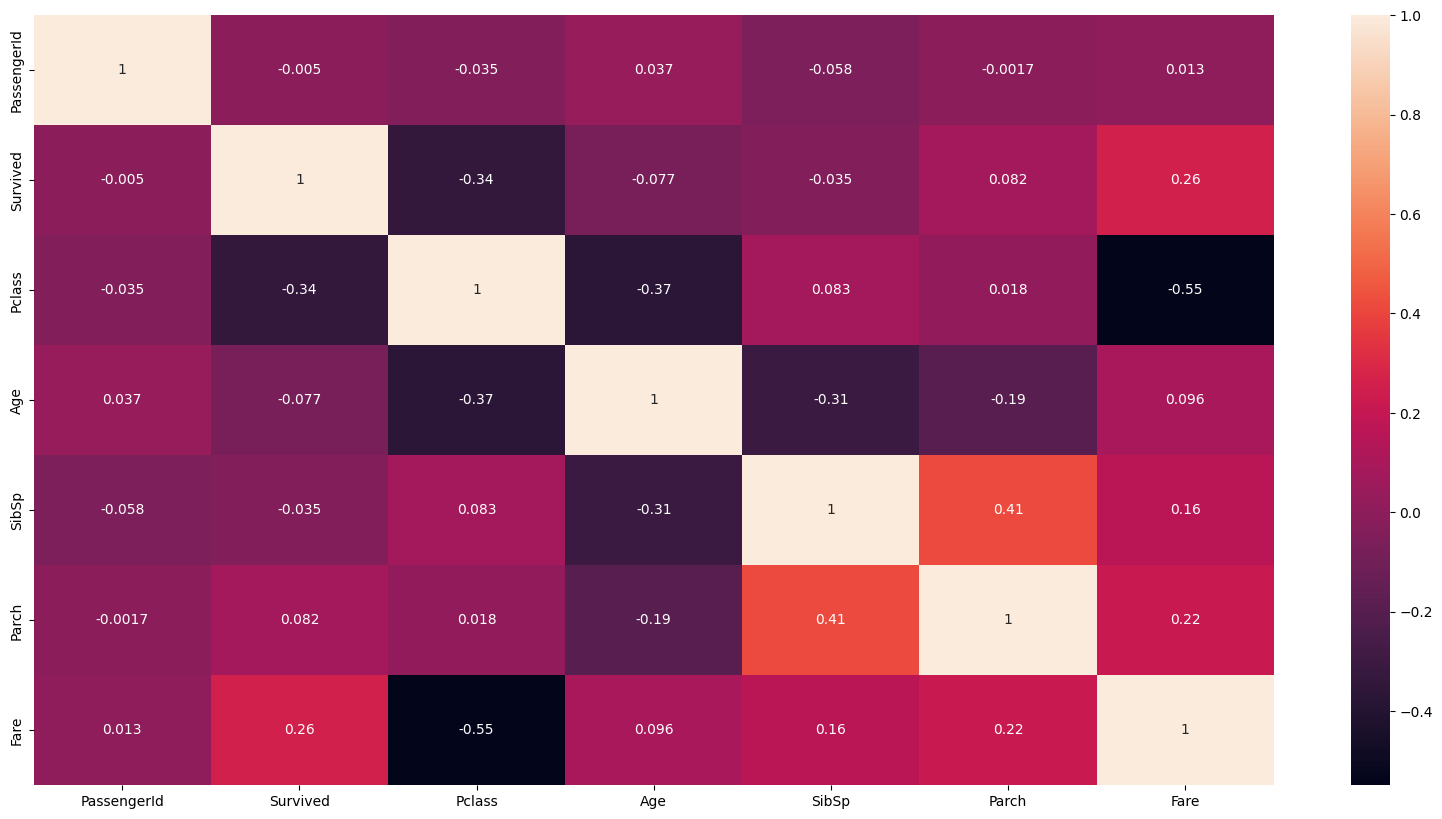

In [13]:
corr = df.corr()

plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [14]:
# checking null value counts in null valued columns


print(df['Age'].value_counts())
print()
print(df['Cabin'].value_counts())
print()
print(df['Embarked'].value_counts())

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [15]:
# handling null values in null value columns with median

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
#  dropping cabin column as it is not required

df = df.drop(['Cabin'],axis=1)

In [17]:
#  label encoding Embarked Column

le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [18]:
#  removing names column as it not required for tarinig

df = df.drop(['Name'],axis = 1)


In [19]:
#  removing names ticket as it not required for tarinig

df = df.drop(['Ticket'],axis = 1)

In [20]:
# label encoding Sex Column

df['Sex'] = le.fit_transform(df['Sex'])
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [21]:
df.set_index('PassengerId')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,28.0,1,2,23.4500,2


<Axes: >

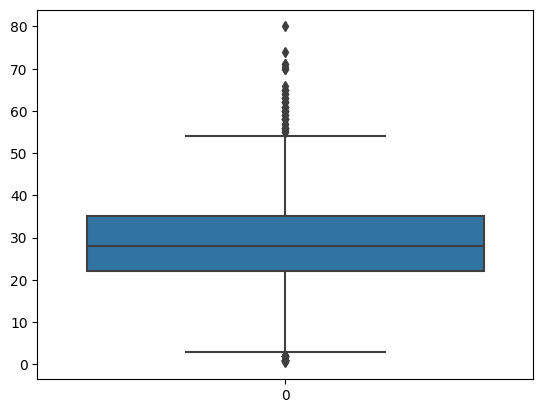

In [22]:
# outlier detection

sns.boxplot(df['Age'])

In [23]:
# splitting the dataset into dependent and independent variables

# Independent Variables

X_Col = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = df[X_Col].copy()
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [24]:
# Dependent Variables

Y = df['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [25]:
# splitting the dataset

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.8,random_state = 100)

In [26]:
print(X_train)
print()
print(Y_train)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
408       3    1  21.0      0      0    7.7750         2
480       3    1   9.0      5      2   46.9000         2
510       3    1  29.0      0      0    7.7500         1
609       1    0  40.0      0      0  153.4625         2
547       2    1  28.0      0      0   13.8625         0
..      ...  ...   ...    ...    ...       ...       ...
855       3    0  18.0      0      1    9.3500         2
871       1    0  47.0      1      1   52.5542         2
835       1    0  39.0      1      1   83.1583         0
792       3    0  28.0      8      2   69.5500         2
520       1    0  30.0      0      0   93.5000         2

[712 rows x 7 columns]

408    0
480    0
510    1
609    1
547    1
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 712, dtype: int64


In [27]:
# Scaling the dataset

sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [28]:
print(X_train)

[[ 0.84505322  0.7243102  -0.66754499 ... -0.47440828 -0.48578107
   0.5754618 ]
 [ 0.84505322  0.7243102  -1.58579886 ...  2.05576923  0.25965275
   0.5754618 ]
 [ 0.84505322  0.7243102  -0.05537574 ... -0.47440828 -0.48625739
  -0.68137502]
 ...
 [-1.52375737 -1.38062393  0.70983582 ...  0.79068047  0.95046842
  -1.93821184]
 [ 0.84505322 -1.38062393 -0.13189689 ...  2.05576923  0.69119463
   0.5754618 ]
 [-1.52375737 -1.38062393  0.02114542 ... -0.47440828  1.14750492
   0.5754618 ]]
